# Herramienta para la manipulación, visualización y análisis listas de series temporales.

In [1]:
import davepy as dp
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

Considerando el hecho que una serie de tiempo es el conjunto de datos numéricos de tipo real ordenado en función del tiempo. 

En el siguiente ejemplo se construye una serie de tiempo que sigue una función bien definida, en un intervalo de tiempo

Si existiera un error un objeto BadRequeste le indicará cuál es su posile error.

In [2]:
np.random.seed(0)

def f(x):
    i = round(np.random.rand())
    if i:
        return(100*np.exp(-0.01/x))
    else:
        return(np.nan)
#número de días
n = 30
base = datetime.datetime.today()
date = [base - datetime.timedelta(days=x) for x in range(0, n)]
X = [f(i) for i in range(1,len(date)+1)]
name = "Ejemplo"
ej = dp.RestoreData(X,date,name)

## Visualización de los datos

Aprovechando la estructura formada por la librería pandas, se genera una matriz que almacenará todos las transformaciones y operaciones que quiera conservar, además de poder visualizar gráficamente todas las colúmnas. La columa setid, busca ser un conjunto que pueda clasificar a los elementos de su lista.

In [3]:
# Objeto contenedor
ej.df.head()
ej.df.tail()

date       data setid
25 2020-12-18 20:13:15.475924  99.961546     V
26 2020-12-17 20:13:15.475924        NaN     V
27 2020-12-16 20:13:15.475924  99.964292     V
28 2020-12-15 20:13:15.475924  99.965523     V
29 2020-12-14 20:13:15.475924        NaN     V

---------------------------------
--------DESCRIBE FUNCTION--------

Object name: Ejemplo
Cols size: 3
Rows size: 30
       Oldest date --- Current date
2020-12-14 20:13:15.475924 --- 2021-01-12 20:13:15.475924
NaN count: 10
Max:  99.96552318599922
Min:  99.0049833749168
Mode:  99.0049833749168
Mean (skipna):  99.83986544314696

---------------------------------
-----------PLOTS-------------


/home/aceron/Documentos/GitHub/ssocial/davepy.py:479: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


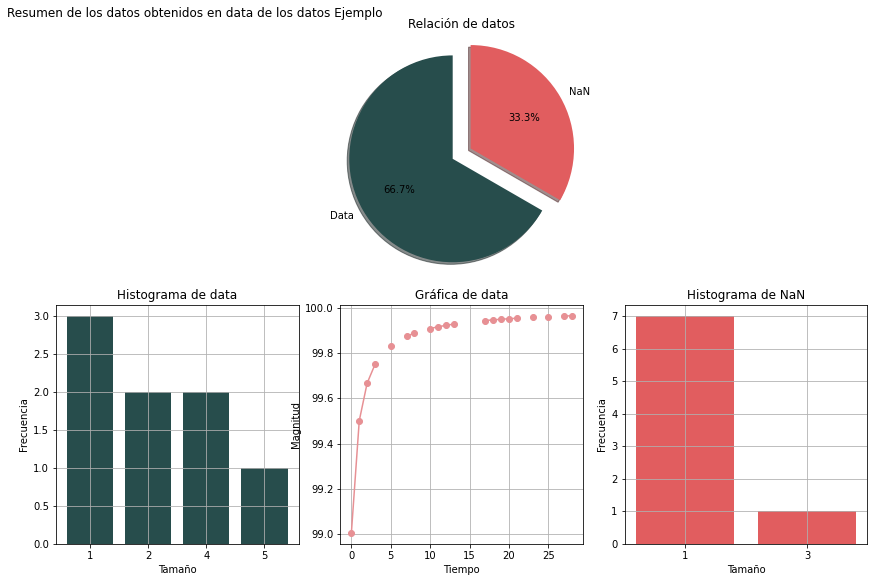

In [4]:
# Resumen visual de los datos
ej.describe()

Las gráficas son manipulables ya que son modulares, por lo que el usuario podrá crear los gráficos que le permitirán tener información visual de la información

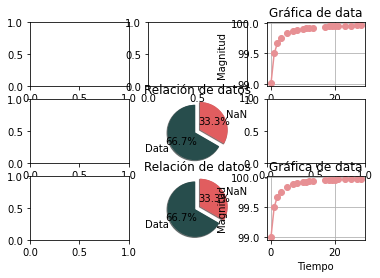

In [5]:
fig,ax = plt.subplots(3,3)
#ej.plot_bar(ax[0,0])
ej.plot_dot(ax[0,2])
ej.plot_pie(ax[1,1])
#ej.plot_bar(ax[2,0])
ej.plot_dot(ax[2,2])
ej.plot_pie(ax[2,1])
plt.show()

Aprovecha también las propiedades del subplot, usted crea su propia gráfica y comparte un espacio para que la gráfica se disponga en esa locación

## Herramientas

Usando los métodos implementados en RestoreData, se pueden reailizar diferentes acciones con el mínimo de los parámtros sin limitar la personalización de las acciones. 

En los siguientes ejemplo se mostrará como, agregar, eliminar, crear y extraer infomración de los datos almacenados.

In [6]:
#Agregando y visualizando nuevos datos
nuevos = [i for i in range(n)]
ej.addCol("nuevos",nuevos)
ej.df.head()

date       data setid  nuevos
0 2021-01-12 20:13:15.475924  99.004983     E       0
1 2021-01-11 20:13:15.475924  99.501248     E       1
2 2021-01-10 20:13:15.475924  99.667222     E       2
3 2021-01-09 20:13:15.475924  99.750312     E       3
4 2021-01-08 20:13:15.475924        NaN     E       4

---------------------------------
--------DESCRIBE FUNCTION--------

Object name: Ejemplo
Cols size: 4
Rows size: 30
       Oldest date --- Current date
2020-12-14 20:13:15.475924 --- 2021-01-12 20:13:15.475924
NaN count: 0
Max:  29
Min:  0
Mode:  0
Mean (skipna):  14.5

---------------------------------
-----------PLOTS-------------


/home/aceron/Documentos/GitHub/ssocial/davepy.py:479: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


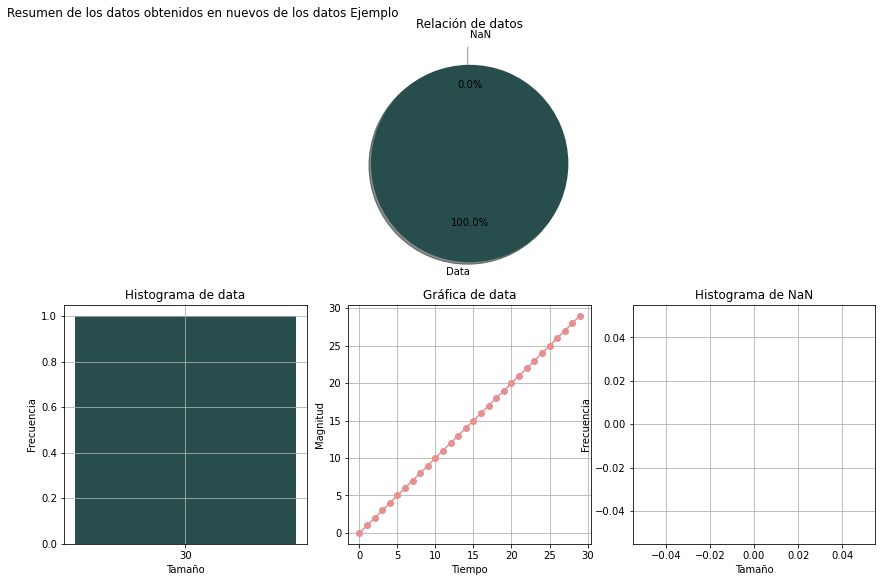

In [7]:
# Descripción de los nuevos datos
ej.describe("nuevos")

In [8]:
#Eliminando nuevos datos
print("\n Agregando datos", end="\n")
ej.addCol("nuevos2",nuevos)
print(ej.df.head())
print("\n Elminando datos", end="\n")
ej.drop("nuevos")
print(ej.df.head())


 Agregando datos
                        date       data setid  nuevos  nuevos2
0 2021-01-12 20:13:15.475924  99.004983     E       0        0
1 2021-01-11 20:13:15.475924  99.501248     E       1        1
2 2021-01-10 20:13:15.475924  99.667222     E       2        2
3 2021-01-09 20:13:15.475924  99.750312     E       3        3
4 2021-01-08 20:13:15.475924        NaN     E       4        4

 Elminando datos
                        date       data setid  nuevos2
0 2021-01-12 20:13:15.475924  99.004983     E        0
1 2021-01-11 20:13:15.475924  99.501248     E        1
2 2021-01-10 20:13:15.475924  99.667222     E        2
3 2021-01-09 20:13:15.475924  99.750312     E        3
4 2021-01-08 20:13:15.475924        NaN     E        4


Puesto que en el fonda la estrucutra es un DataFrame, uno puede aprovechar algunas de sus herramientas para realizar operaciones o extracciónes 

In [9]:
#Usando métodos de pandas
datos = ej.df[(ej.df["nuevos2"] > 4) & (ej.df["nuevos2"] < 8)]
print(datos)

                        date       data setid  nuevos2
5 2021-01-07 20:13:15.475924  99.833472     E        5
6 2021-01-06 20:13:15.475924        NaN     E        6
7 2021-01-05 20:13:15.475924  99.875078     E        7


In [10]:
#Exportando información
##CSV
ej.export()
##Excel
ej.export('xlsx')

In [11]:
ex = pd.read_csv(name+'.csv')
print("\n Datos Almacenados en formato CSV", end="\n")
print(ex.head())
cv = pd.read_excel(name+'.xlsx')
print("\n Datos Almacenados en formato xlsx", end="\n")
print(cv.head())


 Datos Almacenados en formato CSV
                         date       data setid  nuevos2
0  2021-01-12 20:13:15.475924  99.004983     E        0
1  2021-01-11 20:13:15.475924  99.501248     E        1
2  2021-01-10 20:13:15.475924  99.667222     E        2
3  2021-01-09 20:13:15.475924  99.750312     E        3
4  2021-01-08 20:13:15.475924        NaN     E        4

 Datos Almacenados en formato xlsx
                     date       data setid  nuevos2
0 2021-01-12 20:13:15.476  99.004983     E        0
1 2021-01-11 20:13:15.476  99.501248     E        1
2 2021-01-10 20:13:15.476  99.667222     E        2
3 2021-01-09 20:13:15.476  99.750312     E        3
4 2021-01-08 20:13:15.476        NaN     E        4


Para el funcionamiento de diferentes métodos mostrados se hace uso de métodos que el usuario puede usar, en el siguiente ejemplo se mostrará cómo se deben ussar.

In [12]:
#Summary muestrá un resumen de la información de la columna elegida
ej.summary()

---------------------------------
--------DESCRIBE FUNCTION--------

Object name: Ejemplo
Cols size: 4
Rows size: 30
       Oldest date --- Current date
2020-12-14 20:13:15.475924 --- 2021-01-12 20:13:15.475924
NaN count: 10
Max:  99.96552318599922
Min:  99.0049833749168
Mode:  99.0049833749168
Mean (skipna):  99.83986544314696

---------------------------------


In [13]:
ej.summary("nuevos2")

---------------------------------
--------DESCRIBE FUNCTION--------

Object name: Ejemplo
Cols size: 4
Rows size: 30
       Oldest date --- Current date
2020-12-14 20:13:15.475924 --- 2021-01-12 20:13:15.475924
NaN count: 0
Max:  29
Min:  0
Mode:  0
Mean (skipna):  14.5

---------------------------------


In [14]:
#Counter, regresa un diccionario de los datos
# la llave del diccionario es la posición de inicio
# el valor es la cantidad de datos de tipo 'nan' o 'no-nan'
# continuos en los datos
count_data,count_nan = ej.counter()
print("Diccionario de datos",end='\n')
print(count_nan)
print("\n Diccionario de nan",end='\n')
print(count_data)

count_data,count_nan = ej.counter('nuevos2')
print("\n Diccionario de nan",end='\n')
print(count_nan)
print("\n Diccionario de datos",end='\n')
print(count_data)

Diccionario de datos
{4: 2, 1: 3, 2: 2, 5: 1}

 Diccionario de nan
{1: 7, 3: 1}

 Diccionario de nan
{30: 1}

 Diccionario de datos
{}


In [15]:
#Obteniendo indicies con nan falsos
dis_datos = [np.random.randint(i) for i in range(1,11)]
dis_huecos = [np.random.randint(i) for i in range(1,11)]
print(ej.df['data'].tolist())
print(ej.getFakeIndex(dist=[dis_datos,dis_huecos]))

[99.0049833749168, 99.50124791926824, 99.66722160545233, 99.75031223974601, nan, 99.83347214509386, nan, 99.8750780924581, 99.88895059442793, nan, 99.90913221888589, 99.91670137924584, 99.92310650129109, 99.92859693270275, nan, nan, nan, 99.94445987368582, 99.94738226903857, 99.95001249791693, 99.95239228844999, 99.9545557835589, nan, 99.95834201268337, nan, 99.96154585704, nan, 99.96429209107757, 99.96552318599922, nan]
{9: 2}


In [16]:
#Obteneiendo indidces de datos y huecos
print(ej.getIndex(type='data'))
print(ej.getIndex(type='nan'))

{0: 4, 5: 1, 7: 2, 10: 4, 17: 5, 23: 1, 25: 1, 27: 2}
{4: 1, 6: 1, 9: 1, 14: 3, 22: 1, 24: 1, 26: 1, 29: 1}


## Reconstruyendo datos usando librerias de python

Python presenta librerias desarrolladas para aplicaciones de Machine Learning como pytochort o scikit-learn. 

En los siguientes ejemplos mostraremos cómo usar la libreria para recontruir o predecir la información usando algunos de los algoritmos más conocidos como:
 * Regresión Lineal
 * Vecinos cercanos
 * SVM

In [17]:
from sklearn.linear_model import LinearRegression

### Regresión Lineal

In [18]:
positions = ej.getFakeIndex(dist=[dis_datos,dis_huecos],h = 1)
print(positions)

{6: 1}


In [19]:
#Usando huecos falsos de tamaño h
ini = 0
colname = 'data'
rec = dict()
ln = []
ej.addCol(colname='rec')

f = lambda x,a,b: a + b*x

plt.figure(figsize=(10,10))
for pos in list(positions.keys()):
    #print(pos,":",positions[pos])
    #print("Data: ",ini,pos)
    #print(ej.df['data'].iloc[ini:pos])
    #print(ej.df['data'].iloc[ini:pos].dropna())
    data = ej.df[colname].iloc[ini:pos].dropna()
    if len(data) != 0:
        #print(data)
        X = np.arange(len(data)).reshape(-1,1)
        reg = LinearRegression().fit(X, data)
        #print(pos,f(len(data),reg.intercept_,reg.coef_))
        rec[pos] = f(len(data),reg.intercept_,reg.coef_)
        print("Parámetros: {},{}".format(reg.intercept_,reg.coef_))
        print("Reconstrucción: ",rec[pos])
        ln.extend([f(x,reg.intercept_,reg.coef_) 
                 for x in range(len(data)+1)])
        ini = pos+2
    else:
        continue

for key,val in rec.items():
    ej.df.loc[key,'rec'] = val
    
plt.plot(ej.df['data'],'o-',color='blue',label='Valores reales')
plt.plot(ln,color='red',label="Linea")
plt.plot(ej.df['rec'],'o',color='green',label='Reconstrucción')
plt.title("Reconstrucción usando RL")
plt.xlabel("Valores")
plt.ylabel("Indice")
plt.grid()
plt.legend()

Parámetros: 99.17023908472906,[0.19060419]
Reconstrucción:  [100.12326002]


In [20]:
print("Datos reconstruidos",end='\n')
print(ej.df.loc[list(rec.keys()),'rec'])
print("\n Datos reales")
print(ej.df.loc[list(rec.keys()),'data'])
print("\n Error", end="\n")
print(ej.df.loc[list(rec.keys()),'rec'] - ej.df.loc[list(rec.keys()),'data'])

Datos reconstruidos
6    100.12326
Name: rec, dtype: float64

 Datos reales
6   NaN
Name: data, dtype: float64

 Error
6   NaN
dtype: float64


Parámetros: 99.12064724274508,[0.24019603]
Reconstrucción:  [100.08143136]
Parámetros: 99.87507809245811,[0.0138725]
Reconstrucción:  [99.9028231]
Parámetros: 99.9197101550287,[0.00569737]
Reconstrucción:  [99.96528909]
Parámetros: 99.96154585704,[0.]
Reconstrucción:  [99.96154586]
Parámetros: 99.96552318599922,[0.]
Reconstrucción:  [99.96552319]


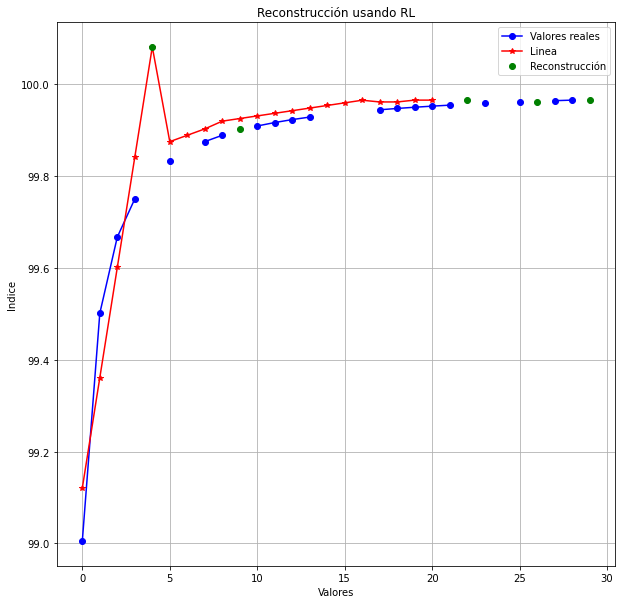

In [21]:
#Usando huecos reales de tamaño h
positions = ej.getIndex(type='nan',h=1)
ini = 0
colname = 'data'
rec = dict()
ln = []
ej.addCol(colname='rec')

f = lambda x,a,b: a + b*x

plt.figure(figsize=(10,10))
for pos in list(positions.keys()):
    #print(pos,":",positions[pos])
    #print("Data: ",ini,pos)
    #print(ej.df['data'].iloc[ini:pos])
    #print(ej.df['data'].iloc[ini:pos].dropna())
    data = ej.df[colname].iloc[ini:pos].dropna()
    if len(data) != 0:
        #print(data)
        X = np.arange(len(data)).reshape(-1,1)
        reg = LinearRegression().fit(X, data)
        #print(pos,f(len(data),reg.intercept_,reg.coef_))
        rec[pos] = f(len(data),reg.intercept_,reg.coef_)
        print("Parámetros: {},{}".format(reg.intercept_,reg.coef_))
        print("Reconstrucción: ",rec[pos])
        ln.extend([f(x,reg.intercept_,reg.coef_) 
                 for x in range(len(data)+1)])
        ini = pos+2
    else:
        continue

for key,val in rec.items():
    ej.df.loc[key,'rec'] = val
    
plt.plot(ej.df['data'],'o-',color='blue',label='Valores reales')
plt.plot(ln,'*-',color='red',label="Linea")
plt.plot(ej.df['rec'],'o',color='green',label='Reconstrucción')
plt.title("Reconstrucción usando RL")
plt.xlabel("Valores")
plt.ylabel("Indice")
plt.grid()
plt.legend()

In [22]:
print("Datos reconstruidos",end='\n')
print(ej.df.loc[list(rec.keys()),'rec'])
print("\n Datos reales")
print(ej.df.loc[list(rec.keys()),'data'])
print("\n Error", end="\n")
print(ej.df.loc[list(rec.keys()),'rec'] - ej.df.loc[list(rec.keys()),'data'])

Datos reconstruidos
4     100.081431
9      99.902823
22     99.965289
26     99.961546
29     99.965523
Name: rec, dtype: float64

 Datos reales
4    NaN
9    NaN
22   NaN
26   NaN
29   NaN
Name: data, dtype: float64

 Error
4    NaN
9    NaN
22   NaN
26   NaN
29   NaN
dtype: float64


### Orthogonol Matching Pursuit

In [23]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression

In [24]:
#Usando huecos reales de tamaño h
positions = ej.getIndex(type='nan',h=1)
ini = 0
colname = 'data'
rec = dict()
ln = []
ej.addCol(colname='rec')

f = lambda x,a,b: a + b*x

plt.figure(figsize=(10,10))
data = ej.df[colname].dropna()
X = np.arange(len(data)).reshape(-1,1)
reg = OrthogonalMatchingPursuit().fit(X, data)

for pos in positions:
    #rec[pos] = reg.predict([[pos]])
    ej.df.loc[pos,'rec'] = reg.predict([[pos]])
    
plt.plot(ej.df['data'],'o-',color='blue',label='Valores reales')
plt.plot(ej.df['rec'],'o',color='green',label='Reconstrucción')
plt.title("Reconstrucción usando RL")
plt.xlabel("Valores")
plt.ylabel("Indice")
plt.grid()
plt.legend()

## Reconstruyendo datos usando funciones propias

In [25]:
def predict(obj,pos):
    try:
        data = obj.df.loc[pos-1:pos+1,'data'].reset_index()
        return((data['data'][2]+ data['data'][0])/2)
    except:
        raise Exception

False


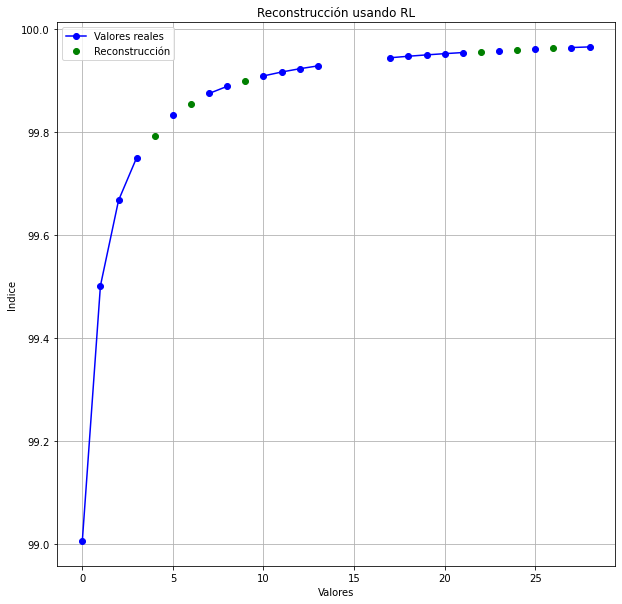

In [26]:
#Usando huecos reales de tamaño h
positions = ej.getIndex(type='nan',h=1)
ini = 0
colname = 'data2'
rec = dict()
ej.addCol(colname='rec2')

for pos,h in positions.items():
    try:
        ej.df.loc[pos,'rec2'] = predict(ej,pos)
    except:
        print(False)
    
plt.figure(figsize=(10,10))    
plt.plot(ej.df['data'],'o-',color='blue',label='Valores reales')
plt.plot(ej.df['rec2'],'o',color='green',label='Reconstrucción')
plt.title("Reconstrucción usando RL")
plt.xlabel("Valores")
plt.ylabel("Indice")
plt.grid()
plt.legend()

# Datos reales

In [27]:
f = pd.read_csv("fCDMX.csv")
print(f.head())

                  date  MER  PED  SAG  TLA  XAL  FAC  UIZ  CUA  MON  ...  MPA  \
0  01/01/1986 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
1  01/01/1986 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2  01/01/1986 03:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
3  01/01/1986 04:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
4  01/01/1986 05:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

   TPN  SUR  AZC  CES  PLA  LAG  TAC  TAX  HAN  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 44 columns]


In [28]:
#Diez miel datos
n = 10000

date = f['date'].tolist()[:n]
data = f['PED'].tolist()[:n]

fped = dp.RestoreData(data,date,'PED')

In [29]:
fped.df.head()

date  data setid
0 1986-01-01 01:00:00   NaN     E
1 1986-01-01 02:00:00   NaN     E
2 1986-01-01 03:00:00   NaN     E
3 1986-01-01 04:00:00   NaN     E
4 1986-01-01 05:00:00   NaN     E

In [30]:
fped.df.tail()

date  data setid
9995 1987-05-04 12:00:00   NaN     V
9996 1987-05-04 13:00:00   NaN     V
9997 1987-05-04 14:00:00   NaN     V
9998 1987-05-04 15:00:00   NaN     V
9999 1987-05-04 16:00:00   NaN     V

---------------------------------
--------DESCRIBE FUNCTION--------

Object name: PED
Cols size: 3
Rows size: 10000
       Oldest date --- Current date
1986-01-01 01:00:00 --- 1987-06-03 00:00:00
NaN count: 6708
Max:  441.0
Min:  1.0
Mode:  5.0
Mean (skipna):  51.91373025516403

---------------------------------
-----------PLOTS-------------


/home/aceron/Documentos/GitHub/ssocial/davepy.py:479: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


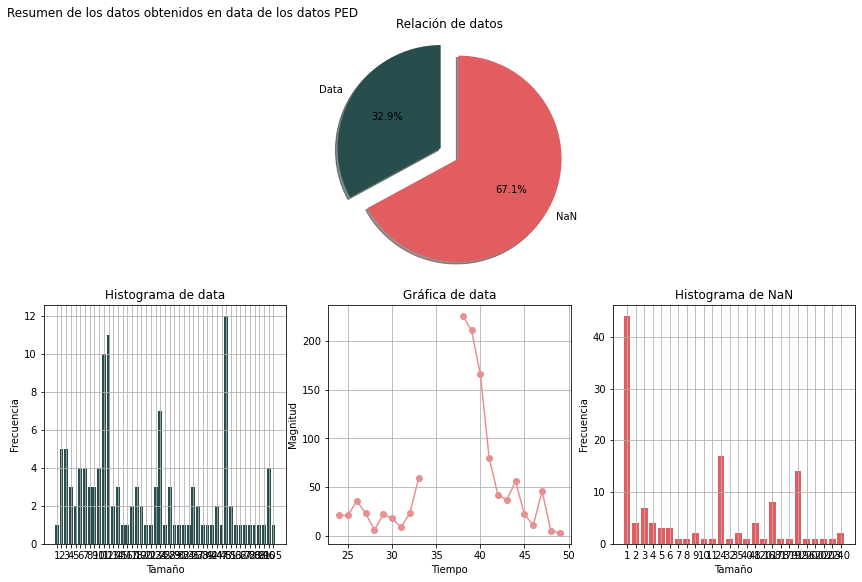

In [31]:
# Resumen visual de los datos
fped.describe()

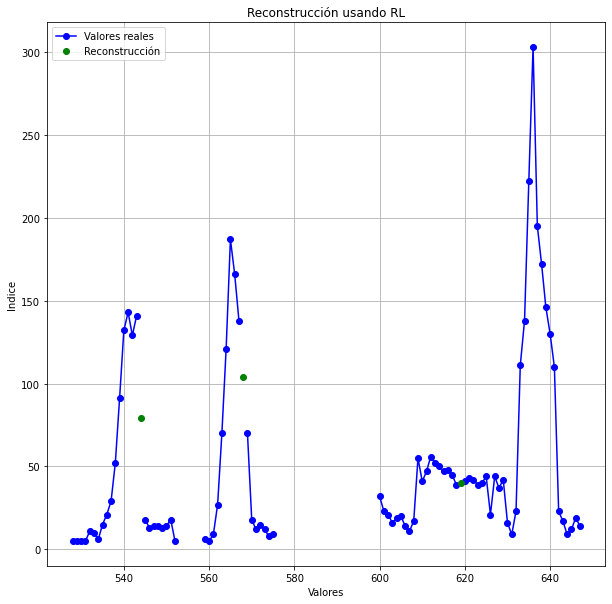

In [32]:
#Usando huecos reales de tamaño h
positions = fped.getIndex(type='nan',h=1)
ini = 0
colname = 'data'
rec = dict()
fped.addCol(colname='rec')

for pos,h in positions.items():
    try:
        fped.df.loc[pos,'rec'] = predict(fped,pos)
        rec[pos] = predict(fped,pos)
    except:
        continue
    
plt.figure(figsize=(10,10))    
plt.plot(fped.df['data'][500:700],'o-',color='blue',label='Valores reales')
plt.plot(fped.df['rec'][500:700],'o',color='green',label='Reconstrucción')
plt.title("Reconstrucción usando RL")
plt.xlabel("Valores")
plt.ylabel("Indice")
plt.grid()
plt.legend()

In [33]:
print("Datos reconstruidos",end='\n')
print(fped.df.loc[list(rec.keys()),'rec'])
print("\n Datos reales")
print(fped.df.loc[list(rec.keys()),'data'])
print("\n Error", end="\n")
print(fped.df.loc[list(rec.keys()),'rec'] - fped.df.loc[list(rec.keys()),'data'])

Datos reconstruidos
544      79.5
568     104.0
619      40.0
900      46.5
906      37.0
1436     12.5
1474    119.0
1688     27.5
1767     46.5
2267    113.0
2279      5.5
2915    196.0
3782     64.5
4643    250.0
5803     31.0
6062    195.5
6065     93.5
6355     46.0
6590    103.0
6642     50.0
6665    101.0
7775      9.5
7793    200.5
7795     59.5
8076    224.5
8604    186.5
8607    147.0
8802     21.5
8822     31.0
9180    174.0
9252     69.0
9294     21.5
9452     26.5
9455     21.0
9459     32.0
9516     77.5
9572      5.0
9658     35.5
9670      7.0
9762     33.0
9786     31.5
9846     10.5
9903    188.0
9947     75.5
Name: rec, dtype: float64

 Datos reales
544    NaN
568    NaN
619    NaN
900    NaN
906    NaN
1436   NaN
1474   NaN
1688   NaN
1767   NaN
2267   NaN
2279   NaN
2915   NaN
3782   NaN
4643   NaN
5803   NaN
6062   NaN
6065   NaN
6355   NaN
6590   NaN
6642   NaN
6665   NaN
7775   NaN
7793   NaN
7795   NaN
8076   NaN
8604   NaN
8607   NaN
8802   NaN
8822   NaN
9180

# Datos aleaotrios

In [34]:
from lorenz import *

In [35]:
data = generateLorenz().tolist()
n = len(data)
base = datetime.datetime.today()
date = [base - datetime.timedelta(days=x) for x in range(0, n)]
print(len(data)==len(date))
lorenz = dp.RestoreData(data,date,'Lorenz')

True


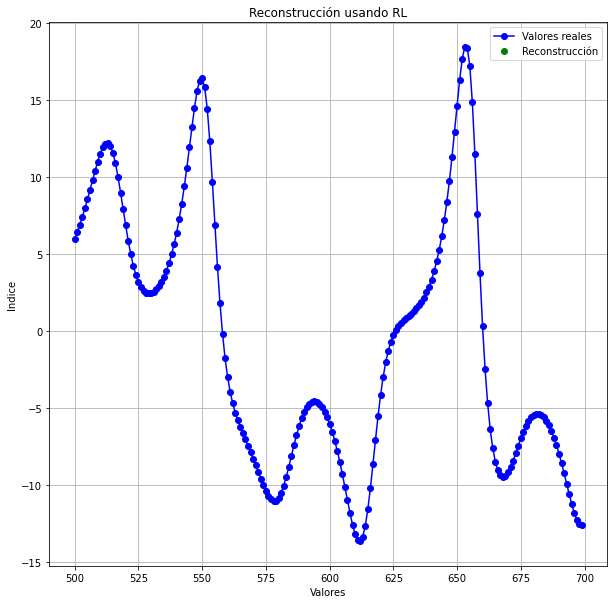

In [36]:
#Usando huecos reales de tamaño h
#positions = lorenz.getIndex(type='nan',h=1)
positions = lorenz.getFakeIndex(dist=[dis_datos,dis_huecos],h = 1)
ini = 0
colname = 'data'
rec = dict()
lorenz.addCol(colname='rec')

for pos,h in positions.items():
    try:
        lorenz.df.loc[pos,'rec'] = predict(lorenz,pos)
        rec[pos] = predict(lorenz,pos)
    except:
        continue
    
plt.figure(figsize=(10,10))    
plt.plot(lorenz.df['data'][500:700],'o-',color='blue',label='Valores reales')
plt.plot(lorenz.df['rec'][500:700],'o',color='green',label='Reconstrucción')
plt.title("Reconstrucción usando RL")
plt.xlabel("Valores")
plt.ylabel("Indice")
plt.grid()
plt.legend()

In [37]:
print("Datos reconstruidos",end='\n')
print(lorenz.df.loc[list(rec.keys()),'rec'])
print("\n Datos reales")
print(lorenz.df.loc[list(rec.keys()),'data'])
print("\n Error", end="\n")
print(lorenz.df.loc[list(rec.keys()),'rec'] - lorenz.df.loc[list(rec.keys()),'data'])

Datos reconstruidos
187     -6.038107
225      2.301275
963     -9.407806
999    -12.068892
1451    -3.586831
1457    -3.495210
1882    13.165757
1921    -9.710537
3041    -9.581787
3238   -15.000561
3751   -15.490509
3910    -3.616107
4105    -7.691917
4797    -9.513823
5060     1.371868
5626   -10.819698
6971    -4.723072
7637    -9.698465
7708    -5.095871
8343   -11.940753
8594     1.461733
8629     5.271188
8705    -8.812849
8904     1.971114
8987   -12.101097
9060     5.999058
9247    -7.890076
9940   -10.727346
Name: rec, dtype: float64

 Datos reales
187     -6.000279
225      2.274079
963     -9.410902
999    -12.116633
1451    -3.531324
1457    -3.461174
1882    13.394044
1921    -9.817367
3041    -9.717525
3238   -15.100713
3751   -15.555657
3910    -3.546204
4105    -7.671350
4797    -9.602764
5060     1.639052
5626   -10.845710
6971    -4.631748
7637    -9.737147
7708    -4.978090
8343   -12.105077
8594     1.650365
8629     5.231722
8705    -8.852614
8904     1.990429
898